# Surface Corrections


In [1]:
from PeriFlakes import *
from SimDataDB import *
from matplotlib import pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]

In [2]:
sdb = SimDataDB('surfaceresults.db')

In [14]:
H = 2.0 ; T = 1.0 ; E = 1.0 ; nu = 0.0;
solutions = {'uniaxial': (1, T*H*(2.0*nu**2+nu-1.0)/(E*(nu-1))),
             'isotropic':(1, T*H*(1.0-nu-2.0*nu**2)/E),
             'shear':    (0, 2.0*T*H*(1.0+nu)/E) }

In [25]:
L=1.0
N=10
delta= 1.5*2.0*L/float(N)
PB = PeriBlock(L,N,delta,ficticious=True,E=E,nu=nu)
PB.setbcs([(PB.right,0),(PB.left,0),(PB.bottom,1)], [(PB.top,[0,1])])

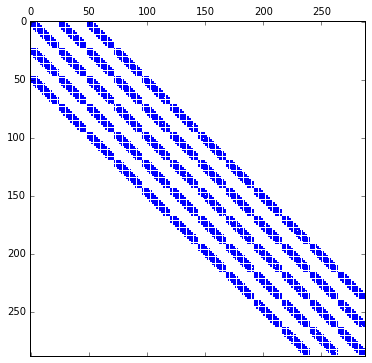

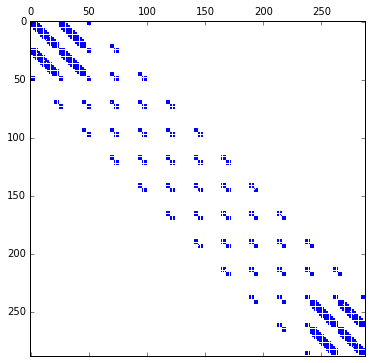

In [26]:
K,R = PB._assemble_KR("Fbased","cubic")
plt.spy(K,marker=',')
plt.show()
Kf,Rf = PB._assemble_KR_fict("standard","Fbased","cubic")
plt.spy(Kf,marker=',')
plt.show()


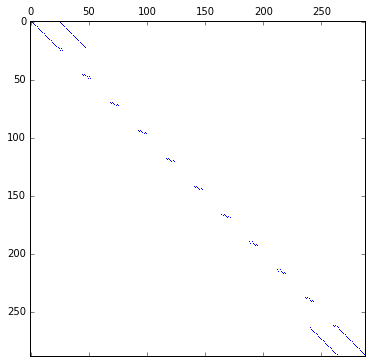

In [27]:
Kf,Rf = PB._assemble_KR_fict("bobaru","Fbased","cubic")
plt.spy(Kf,marker=',')
plt.show()

In [28]:
PB.HFictStencil4.view()

[array([[  1,  13,  14,  12],
        [  2,  14,  13,  15],
        [  3,  15,  14,  16],
        [  4,  16,  17,  15],
        [  5,  17,  18,  16],
        [  6,  18,  17,  19],
        [  7,  19,  18,  20],
        [  8,  20,  19,  21],
        [  9,  21,  22,  20],
        [ 10,  22,  21,  23],
        [ 12,  13,  25,   1],
        [ 23,  22,  34,  10],
        [ 24,  25,  13,  37],
        [ 35,  34,  22,  46],
        [ 36,  37,  25,  49],
        [ 47,  46,  34,  58],
        [ 48,  49,  61,  37],
        [ 59,  58,  70,  46],
        [ 60,  61,  73,  49],
        [ 71,  70,  82,  58],
        [ 72,  73,  61,  85],
        [ 83,  82,  70,  94],
        [ 84,  85,  73,  97],
        [ 95,  94,  82, 106],
        [ 96,  97,  85, 109],
        [107, 106,  94, 118],
        [108, 109, 121,  97],
        [119, 118, 130, 106],
        [120, 121, 109, 133],
        [131, 130, 118, 142],
        [133, 121, 122, 120],
        [134, 122, 121, 123],
        [135, 123, 122, 124],
        [1

In [29]:
for e in PB.HFictStencil4:
    print
    for l in PB.dm_PtVec.Get_List(e):
        for m in PB.dm_PtVec.Get_List(e):
            print Kf[l,m]/4.5,
        print 


1.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 -1.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 -1.0 0.0 0.0 0.0 1.0 0.0
0.0 0.0 0.0 -1.0 0.0 0.0 0.0 1.0

1.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 -1.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

1.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 -1.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

1.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 -1.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.

In [42]:
for e in PB.HFictStencil3:
    print
    print Rf[PB.dm_PtVec.Get_List(e)]
    for l in PB.dm_PtVec.Get_List(e):
        for m in PB.dm_PtVec.Get_List(e):
            print Kf[l,m]/4.5,
        
        print 


[ 0.  0.  0.  0.  0.  0.]
1.0 0.0 -1.0 0.0 0.0 0.0
0.0 1.0 0.0 -1.0 0.0 0.0
0.0 0.0 1.0 0.0 -1.0 0.0
0.0 0.0 0.0 1.0 0.0 -1.0
0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0

[ 0.  0.  0.  0.  0.  0.]
1.0 0.0 -1.0 0.0 0.0 0.0
0.0 1.0 0.0 -1.0 0.0 0.0
0.0 0.0 1.0 0.0 -1.0 0.0
0.0 0.0 0.0 1.0 0.0 -1.0
0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0

[ 0. -1.  0.  0.  0.  0.]
1.0 0.0 -1.0 0.0 0.0 0.0
0.0 1.0 0.0 -1.0 0.0 0.0
0.0 0.0 1.0 0.0 -1.0 0.0
0.0 0.0 0.0 1.0 0.0 -1.0
0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0

[ 0. -1.  0.  0.  0.  0.]
1.0 0.0 -1.0 0.0 0.0 0.0
0.0 1.0 0.0 -1.0 0.0 0.0
0.0 0.0 1.0 0.0 -1.0 0.0
0.0 0.0 0.0 1.0 0.0 -1.0
0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0


In [41]:
Rf

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

## Finite difference stencil

These types of surface correction effects are implemented in [ficticious_kernels_pop.py](PeriFlakes/ficticious_kernels_pop.py). 
The finite difference stencil can be generalized by defined a strain between two points,
\begin{equation}
\epsilon^{ab} = \frac{\left(\mathbf{u}^a-\mathbf{u}^b\right)\cdot
	                  \left(\mathbf{x}^a-\mathbf{x}^b\right) }{
					  \left(\mathbf{x}^a-\mathbf{x}^b\right)\cdot
	                  \left(\mathbf{x}^a-\mathbf{x}^b\right) },
\end{equation}
and a normal between two points,
\begin{equation}
\mathbf{n}^{ab} = \frac{\mathbf{x}^a-\mathbf{x}^b}{\left|\mathbf{x}^a-\mathbf{x}^b\right|},
\end{equation}
where $a$ and $b$ are index arguments.
Then, in the direction normal to the surface, $\mathbf{n}^n = \mathbf{n}^{fo}$ and $\epsilon^n=\epsilon^{fo}$.
In the tangential direction, the normal and strain are averaged by both directions to obtain a central finite difference,
$\mathbf{n}^t = \left( \mathbf{n}^{+o} + \mathbf{n}^{o-} \right) / 2$ and 
$\epsilon^t = \left( \epsilon^{+o} + \epsilon^{o-} \right) / 2$. 
If the ficticious node is all the way at an end, only one of the winded directions is used. The final constraint is
\begin{equation}
0 = \epsilon^{n}\mathbf{n}^n + \nu \epsilon^t \mathbf{n}^t -
\bar{\mathbf{t}} * \frac{1}{E} \left[\begin{array}{cc}
1+\nu & 1-\nu^{2}\\\\
1-\nu^{2} & 1+\nu
\end{array} \right] \mathbf{n}^n
\end{equation}
where $*$ is elementwise multiplication.

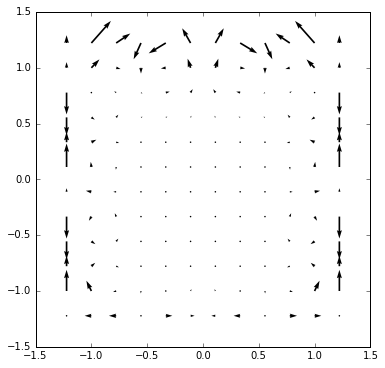

In [43]:
u = PB.solve("Fstab_Silling","cubic",stab=1.0,fictmet='bobaru')
N = int(PB.NPart**0.5)
u = u.reshape(N,N,2)
x = PB.x.reshape(N,N,2)
ax = plt.gca()
ax.quiver(x[:,:,0],x[:,:,1],u[:,:,0],u[:,:,1],angles='uv',scale_units='xy',scale=10.0)
ax.set_aspect('equal', 'datalim')

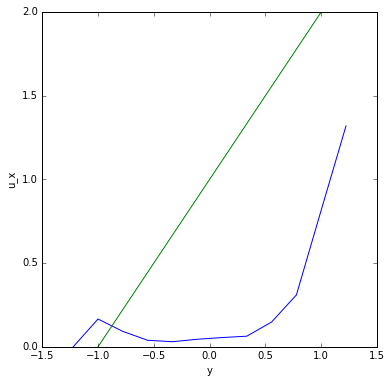

In [44]:
plt.plot(x[:,N/2,1],u[:,N/2,1])
plt.plot([-1,1],[0,solutions['uniaxial'][1]])
plt.xlabel('y'); plt.ylabel('u_x');

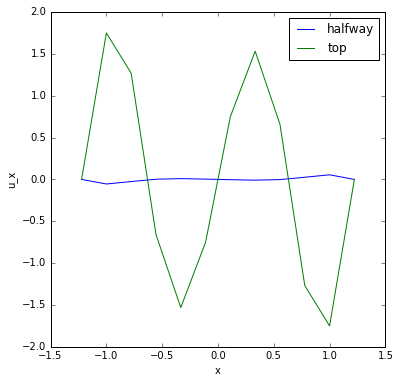

In [45]:
plt.plot(x[:,N/2,1],u[N/2,:,0],label='halfway');
plt.plot(x[:,N/2,1],u[-1,:,0],label='top');
plt.legend()
plt.xlabel('x'); plt.ylabel('u_x');